In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
!pip install wordcloud
from wordcloud import WordCloud
import gensim
import nltk
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
from textblob import Word

Reading File 

In [ ]:
test = pd.read_csv('Test.csv')

In [ ]:
test

text  label
0     I always wrote this series off as being a comp...      0
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2     This movie was so poorly written and directed ...      0
3     The most interesting thing about Miryang (Secr...      1
4     when i first read about "berlin am meer" i did...      0
...                                                 ...    ...
4995  This is the kind of picture John Lassiter woul...      1
4996  A MUST SEE! I saw WHIPPED at a press screening...      1
4997  NBC should be ashamed. I wouldn't allow my chi...      0
4998  This movie is a clumsy mishmash of various gho...      0
4999  Formula movie about the illegitimate son of a ...      0

[5000 rows x 2 columns]

In [ ]:
print(test.shape)

(5000, 2)


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [ ]:
test.describe()

label
count  5000.000000
mean      0.501000
std       0.500049
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

In [ ]:
test['text']

0       I always wrote this series off as being a comp...
1       1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...
2       This movie was so poorly written and directed ...
3       The most interesting thing about Miryang (Secr...
4       when i first read about "berlin am meer" i did...
                              ...                        
4995    This is the kind of picture John Lassiter woul...
4996    A MUST SEE! I saw WHIPPED at a press screening...
4997    NBC should be ashamed. I wouldn't allow my chi...
4998    This movie is a clumsy mishmash of various gho...
4999    Formula movie about the illegitimate son of a ...
Name: text, Length: 5000, dtype: object

In [ ]:
set=pd.concat([test],axis=0,ignore_index=True)
set

text  label
0     I always wrote this series off as being a comp...      0
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2     This movie was so poorly written and directed ...      0
3     The most interesting thing about Miryang (Secr...      1
4     when i first read about "berlin am meer" i did...      0
...                                                 ...    ...
4995  This is the kind of picture John Lassiter woul...      1
4996  A MUST SEE! I saw WHIPPED at a press screening...      1
4997  NBC should be ashamed. I wouldn't allow my chi...      0
4998  This movie is a clumsy mishmash of various gho...      0
4999  Formula movie about the illegitimate son of a ...      0

[5000 rows x 2 columns]

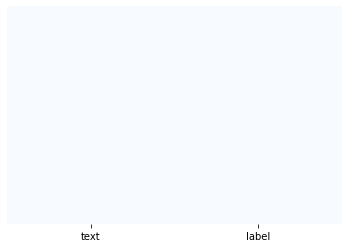

In [ ]:
# to make sure we dont have any null elements
# figure is full white because there is no null values, If there were black spots, they would have been visible
# Doing this heatmap be better before creating test data\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\

sns.heatmap(test.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a35361690>]],
      dtype=object)

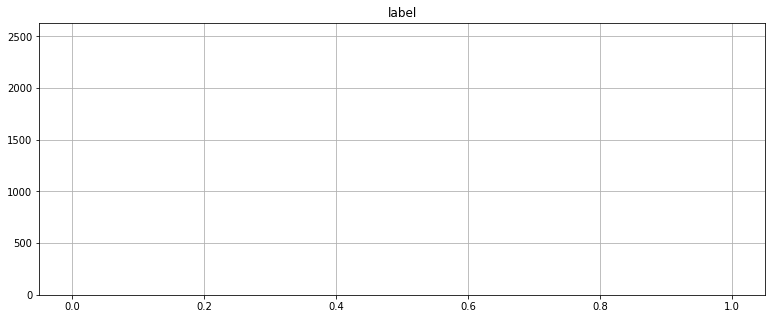

In [ ]:
#Will doing this subplot be better before creating test data
test.hist(bins = 30, figsize = (13,5), color= 'w')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


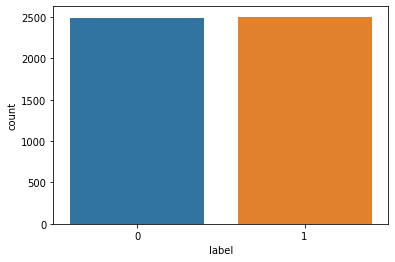

In [ ]:
sns.countplot(test['label'], label = 'Count' )
# 0 = positive tweets , 1 = negative tweets

In [ ]:
#lets get the length of the messages
test['length'] = test['text'].apply(len)

In [ ]:
test

text  label  length
0     I always wrote this series off as being a comp...      0    2105
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0    1070
2     This movie was so poorly written and directed ...      0    1402
3     The most interesting thing about Miryang (Secr...      1    4277
4     when i first read about "berlin am meer" i did...      0    1013
...                                                 ...    ...     ...
4995  This is the kind of picture John Lassiter woul...      1     594
4996  A MUST SEE! I saw WHIPPED at a press screening...      1     856
4997  NBC should be ashamed. I wouldn't allow my chi...      0     649
4998  This movie is a clumsy mishmash of various gho...      0     740
4999  Formula movie about the illegitimate son of a ...      0     637

[5000 rows x 3 columns]

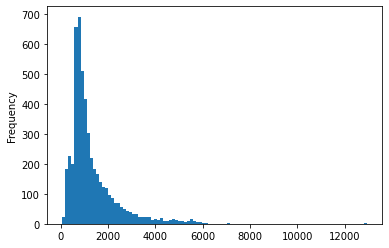

In [ ]:
test['length'].plot(bins=100, kind='hist')

In [ ]:
test.describe()

label        length
count  5000.000000   5000.000000
mean      0.501000   1314.596200
std       0.500049   1010.339949
min       0.000000     67.000000
25%       0.000000    706.000000
50%       1.000000    970.000000
75%       1.000000   1578.500000
max       1.000000  12930.000000

In [ ]:
# lets see the shortest message
# got the minimum length from abouve describe() fucntion that shows min and max of the twittr length
test[test['length'] == 67]['text'].iloc[0]

'Brilliant and moving performances by Tom Courtenay and Peter Finch.'

In [ ]:
test[test['length'] == 12930]['text'].iloc[0]

'(Some spoilers included:)<br /><br />Although, many commentators have called this film surreal, the term fits poorly here. To quote from Encyclopedia Britannica\'s, surreal means:<br /><br />"Fantastic or incongruous imagery": One needn\'t explain to the unimaginative how many ways a plucky ten-year-old boy at large and seeking his fortune in the driver\'s seat of a red Mustang could be fantastic: those curious might read James Kincaid; but if you asked said lad how he were incongruous behind the wheel of a sports car, he\'d surely protest, "NO way!" What fantasies and incongruities the film offers mostly appear within the first fifteen minutes. Thereafter we get more iterations of the same, in an ever-cruder and more squalid progression that, far from incongruous, soon proves predictable. Not that it were, on the other hand, literally believable-- but it were unfair to tax Motorama in particular with this flaw, any plausible suspension of disbelief having fallen precipitously on the 

In [ ]:
#simply divide all my tweets into two data frames (positive and negative tweets).
positive_tweets = test[test['label']==0]
positive_tweets

text  label  length
0     I always wrote this series off as being a comp...      0    2105
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0    1070
2     This movie was so poorly written and directed ...      0    1402
4     when i first read about "berlin am meer" i did...      0    1013
6     I saw a screening of this movie last night. I ...      0    1470
...                                                 ...    ...     ...
4988  I had high expectations following "My Beautifu...      0    1899
4992  This one is just like the 6th movie. The movie...      0     445
4997  NBC should be ashamed. I wouldn't allow my chi...      0     649
4998  This movie is a clumsy mishmash of various gho...      0     740
4999  Formula movie about the illegitimate son of a ...      0     637

[2495 rows x 3 columns]

In [ ]:
#simply divide all my tweets into two data frames (positive and negative tweets).
positive_tweets = test[test['label']==1]
positive_tweets

text  label  length
3     The most interesting thing about Miryang (Secr...      1    4277
5     I saw this film on September 1st, 2005 in Indi...      1    1887
7     William Hurt may not be an American matinee id...      1     955
11    I really enjoyed the detail that went into the...      1     766
18    My interest was raised as I was flipping throu...      1     713
...                                                 ...    ...     ...
4991  Legend of Zu<br /><br />I remember well Tsui H...      1    3297
4993  This film, without doubt, is the clearest exam...      1     777
4994  First, nobody can understand why this movie is...      1    1983
4995  This is the kind of picture John Lassiter woul...      1     594
4996  A MUST SEE! I saw WHIPPED at a press screening...      1     856

[2505 rows x 3 columns]

Plot Wordcloud

In [ ]:
 #simply combine tweets into just one massive string
 sentences = test['text'].tolist()

In [ ]:
sentences

['I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hairy lighth

In [ ]:
len(sentences)

5000

In [ ]:
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

'I always wrote this series off as being a complete stink-fest because Jim Belushi was involved in it, and heavily. But then one day a tragic happenstance occurred. After a White Sox game ended I realized that the remote was all the way on the other side of the room somehow. Now I could have just gotten up and walked across the room to get the remote, or even to the TV to turn the channel. But then why not just get up and walk across the country to watch TV in another state? "Nuts to that", I said. So I decided to just hang tight on the couch and take whatever Fate had in store for me. What Fate had in store was an episode of this show, an episode about which I remember very little except that I had once again made a very broad, general sweeping blanket judgment based on zero objective or experiential evidence with nothing whatsoever to back my opinions up with, and once again I was completely right! This show is a total crud-pie! Belushi has all the comedic delivery of a hairy lightho

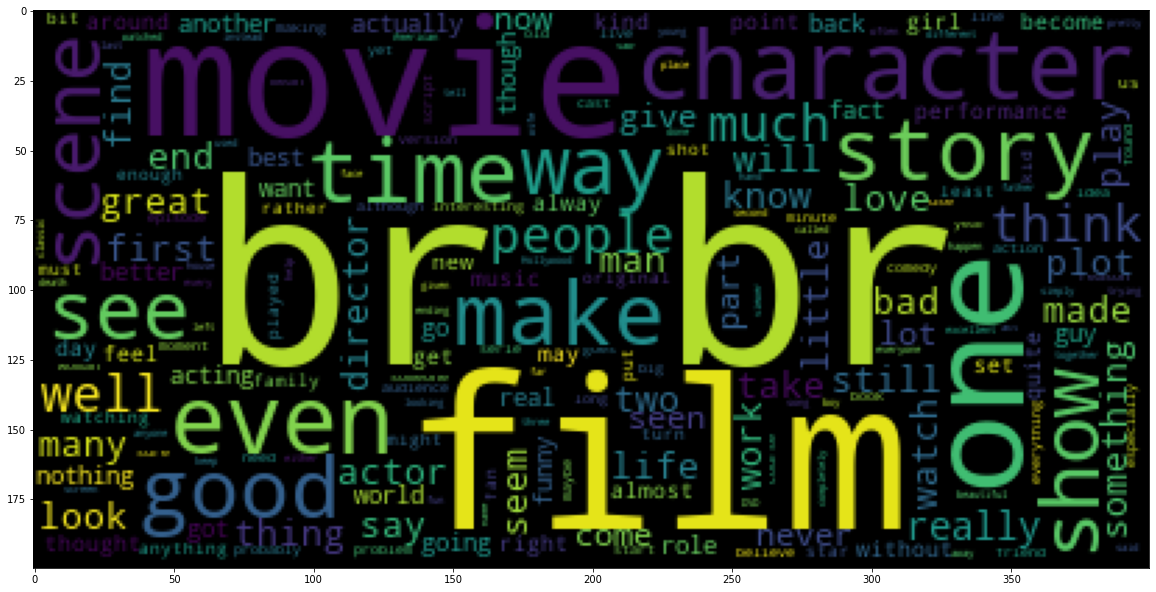

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color="black").generate(str(sentences_as_one_string)))

In [ ]:
 #combine negative tweets into just one massive string
 negative_tweets_list = test['text'].tolist()

In [ ]:
len(negative_tweets_list)

5000

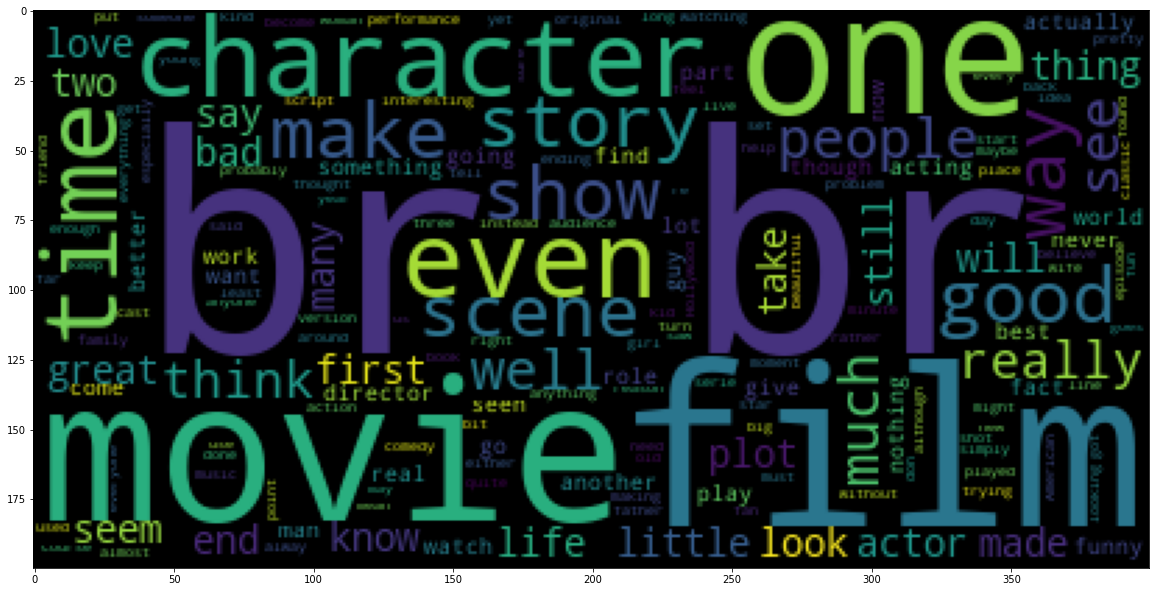

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color="black").generate(str(negative_tweets_list)))

In [ ]:
# data cleaning - Removing Punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# download stowords package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Count Vectorization

In [ ]:
# Counting the number of occurrences each words appears in a document 
from sklearn.feature_extraction.text import CountVectorizer
test_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(test_data)


In [ ]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Message Cleaning

In [ ]:
#define pipeline 
def text_cleaning(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean 

In [ ]:
tweetsClean = test['text'].apply(text_cleaning)

In [ ]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [ ]:
# printing the message post cleaning
print(tweetsClean[6])

['saw', 'screening', 'movie', 'last', 'night', 'high', 'expectations', 'going', 'definitely', 'disappointed', 'Within', '5', 'minutes', 'opening', 'Williams', 'already', 'campaigning', 'presidency', 'becomes', 'president', 'first', '40', 'minutes', 'goes', 'aspect', 'movie', 'first', 'half', 'hour', 'hilarious', 'Dont', 'get', 'wrong', 'movie', 'moments', 'first', 'half', 'hour', 'takes', 'turn', 'worst', 'becomes', 'less', 'comedy', 'thrillerdramalove', 'storywhich', 'pointless', 'movie', 'goes', 'nowhere', 'stands', 'still', 'good', '30', 'minutes', 'laughs', 'interspersed', 'consistently', 'funny', 'part', 'beginning', 'beginning', 'one', 'point', 'biggest', 'cheer', 'heard', 'audience', 'person', 'crowd', 'yelled', 'boooo', 'confusingly', 'emotional', 'scene', 'Williams', 'gives', 'great', 'performance', 'right', 'par', 'comedic', 'style', 'Walken', 'also', 'delivers', 'strong', 'supporting', 'role', 'think', 'one', 'character', 'goes', 'underrated', 'Lewis', 'Black', 'Consistently

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
tweets_countvectorizer = CountVectorizer(analyzer = text_cleaning, dtype = 'uint8').fit_transform(test['text']).toarray()
# tweets_countvectorizer = vectorizer

In [ ]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tweets_countvectorizer.shape

(5000, 59127)

In [ ]:
X = tweets_countvectorizer

In [ ]:
y = test['label']

Naive Bayes Classifier

In [ ]:
X.shape

(5000, 59127)

In [ ]:
y.shape
#sentiments with zeros and ones

(5000,)

In [ ]:
from sklearn.model_selection import train_test_split
# from model_selection module , train_test_split fucntion is imported
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
!pip3 install scipy
!pip install sklearn

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# model predicted positive, in reality that was negative(the class was negative) = false positives
# predictions were negative, the true class were negative= true negatives
# the predictions were negative ,the true class were positive= false negatives or type two error
# NB classifier is train model


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#predicting the test set results
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,

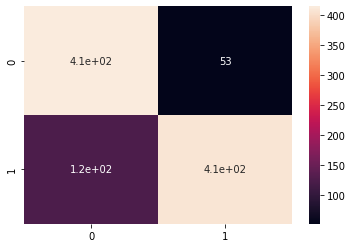

In [ ]:
#predicting the test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm,annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))
# f1-score is harmonic mean between precision and recall

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       467
           1       0.89      0.77      0.82       533

    accuracy                           0.82      1000
   macro avg       0.83      0.83      0.82      1000
weighted avg       0.83      0.82      0.82      1000

